In [1]:
# read the preprocessed data
import pandas as pd
origdf = pd.read_csv('preprocessed_nodummy.csv')



In [4]:
subm = pd.read_csv('data_submission_example.csv')
df = origdf.copy()
print(df.columns)

Index(['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_BANK_ID',
       'CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_FREQUENCY_TYPE',
       'CONTRACT_INCOME', 'CONTRACT_INSTALMENT_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT_2', 'CONTRACT_INTEREST_PERIOD',
       'CONTRACT_INTEREST_RATE', 'CONTRACT_LGD', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_LOAN_CONTRACT_TYPE', 'CONTRACT_LOAN_TO_VALUE_RATIO',
       'CONTRACT_LOAN_TYPE', 'CONTRACT_MARKET_VALUE', 'CONTRACT_MATURITY_DATE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MORTGAGE_TYPE',
       'CONTRACT_REFINANCED', 'CONTRACT_RISK_WEIGHTED_ASSETS',
       'CONTRACT_TYPE_OF_INTEREST_REPAYMENT', 'BORROWER_BIRTH_YEAR',
       'BORROWER_CITIZENSHIP', 'BORROWER_COUNTRY', 'BORROWER_COUNTY',
       'BORROWER_TYPE_OF_CUSTOMER', 'BORROWER_TYPE_OF_SETTLEMENT',
       'TARGET_EVENT', 'TARGET_EVENT_DAY'],
      dtype='object')

In [8]:
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].max()
# min = 0
# max = 1094
1094/3

364.6666666666667

1504811 sor, 34 oszlop

In [21]:
# describe columns type, print only object columns
for col in df.columns:
  if df[col].dtypes == 'object':
    print(df[col].name)


CONTRACT_ID
BORROWER_ID
CONTRACT_BANK_ID
CONTRACT_FREQUENCY_TYPE
CONTRACT_LOAN_TYPE
BORROWER_TYPE_OF_CUSTOMER
TARGET_EVENT


In [25]:
# describe columns type, print only float columns
for col in df.columns:
  if df[col].dtypes != 'object':
    print(df[col].name)

CONTRACT_CREDIT_INTERMEDIARY
CONTRACT_CREDIT_LOSS
CONTRACT_CURRENCY
CONTRACT_DATE_OF_LOAN_AGREEMENT
CONTRACT_DEPT_SERVICE_TO_INCOME
CONTRACT_INCOME
CONTRACT_INSTALMENT_AMOUNT
CONTRACT_INSTALMENT_AMOUNT_2
CONTRACT_INTEREST_PERIOD
CONTRACT_INTEREST_RATE
CONTRACT_LGD
CONTRACT_LOAN_AMOUNT
CONTRACT_LOAN_CONTRACT_TYPE
CONTRACT_LOAN_TO_VALUE_RATIO
CONTRACT_MARKET_VALUE
CONTRACT_MATURITY_DATE
CONTRACT_MORTGAGE_LENDING_VALUE
CONTRACT_MORTGAGE_TYPE
CONTRACT_REFINANCED
CONTRACT_RISK_WEIGHTED_ASSETS
CONTRACT_TYPE_OF_INTEREST_REPAYMENT
BORROWER_BIRTH_YEAR
BORROWER_CITIZENSHIP
BORROWER_COUNTRY
BORROWER_COUNTY
BORROWER_TYPE_OF_SETTLEMENT
TARGET_EVENT_DAY


object változók:
    CONTRACT_ID
    BORROWER_ID
    CONTRACT_BANK_ID
    CONTRACT_FREQUENCY_TYPE
    CONTRACT_LOAN_TYPE
    BORROWER_TYPE_OF_CUSTOMER
    TARGET_EVENT
float64 változók
    CONTRACT_CREDIT_INTERMEDIARY
    CONTRACT_CREDIT_LOSS
    CONTRACT_CURRENCY
    CONTRACT_DATE_OF_LOAN_AGREEMENT
    CONTRACT_DEPT_SERVICE_TO_INCOME
    CONTRACT_INCOME
    CONTRACT_INSTALMENT_AMOUNT
    CONTRACT_INSTALMENT_AMOUNT_2
    CONTRACT_INTEREST_PERIOD
    CONTRACT_INTEREST_RATE
    CONTRACT_LGD
    CONTRACT_LOAN_AMOUNT
    CONTRACT_LOAN_CONTRACT_TYPE
    CONTRACT_LOAN_TO_VALUE_RATIO
    CONTRACT_MARKET_VALUE
    CONTRACT_MATURITY_DATE
    CONTRACT_MORTGAGE_LENDING_VALUE
    CONTRACT_MORTGAGE_TYPE
    CONTRACT_REFINANCED
    CONTRACT_RISK_WEIGHTED_ASSETS
    CONTRACT_TYPE_OF_INTEREST_REPAYMENT
    BORROWER_BIRTH_YEAR
    BORROWER_CITIZENSHIP
    BORROWER_COUNTRY
    BORROWER_COUNTY
    BORROWER_TYPE_OF_SETTLEMENT
    TARGET_EVENT_DAY


In [26]:
df_float = df.copy()
#df_float = df.drop(['BORROWER_ID','CONTRACT_ID'],axis=1)
# MAKE DUMMy FROM THIS:
# CONTRACT_BANK_ID
# CONTRACT_FREQUENCY_TYPE
# CONTRACT_LOAN_TYPE
# BORROWER_TYPE_OF_CUSTOMER
# ne használt label encodingot, helyette one-hot encodingot vagy target encodingot 
dummy_cols_list = ['CONTRACT_BANK_ID', 'CONTRACT_FREQUENCY_TYPE', 'CONTRACT_LOAN_TYPE','BORROWER_TYPE_OF_CUSTOMER']
dummy_names = []

for col in dummy_cols_list:
    dummy_df = pd.get_dummies(df_float.loc[:, col], prefix=col, drop_first=True)
    dummy_df = dummy_df.astype(int)
    dummy_names += dummy_df.columns.tolist()
    df_float = pd.concat([df_float, dummy_df], axis=1)

In [27]:
# save the dummy names in txt
with open('dummy_names.txt', 'w') as f:
    for item in dummy_names:
        f.write("%s\n" % item)

In [37]:
df_float.columns

Index(['CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_INTEREST_RATE',
       ...
       'CONTRACT_LOAN_TYPE_955ae3ef', 'CONTRACT_LOAN_TYPE_95c4f8fb',
       'CONTRACT_LOAN_TYPE_b503a0de', 'CONTRACT_LOAN_TYPE_cde77491',
       'CONTRACT_LOAN_TYPE_cf07c2dd', 'CONTRACT_LOAN_TYPE_d3aaffde',
       'CONTRACT_LOAN_TYPE_eab72d7a', 'CONTRACT_LOAN_TYPE_f792971b',
       'BORROWER_TYPE_OF_CUSTOMER_B', 'target'],
      dtype='object', length=184)

In [38]:
for col in df_float.columns:
  if df_float[col].dtypes == 'object':
    print(df_float[col].name)

In [32]:
df_float['target'] = 0

In [34]:
feltetel = df_float['TARGET_EVENT'] == 'K'

In [35]:
df_float.loc[feltetel, 'target'] = 1

In [36]:
# NOW WE WILL HAVE 184 COLUMNS!
# drop CONTRACT_ID, BORROWER_ID, CONTRACT_BANK_ID, CONTRACT_FREQUENCY_TYPE, CONTRACT_LOAN_TYPE, BORROWER_TYPE_OF_CUSTOMER ,TARGET_EVENT
df_float.drop(['CONTRACT_ID', 'CONTRACT_BANK_ID', 'CONTRACT_FREQUENCY_TYPE', 'CONTRACT_LOAN_TYPE', 'BORROWER_TYPE_OF_CUSTOMER' ,'TARGET_EVENT'],axis=1, inplace=True)

In [41]:
# print columns, which have null values
for col in df_float.columns:
  if df_float[col].isnull().values.any():
    print(df_float[col].name)

CONTRACT_CREDIT_INTERMEDIARY
CONTRACT_CREDIT_LOSS
CONTRACT_DEPT_SERVICE_TO_INCOME
CONTRACT_INCOME
CONTRACT_INSTALMENT_AMOUNT
CONTRACT_INSTALMENT_AMOUNT_2
CONTRACT_INTEREST_PERIOD
CONTRACT_INTEREST_RATE
CONTRACT_LGD
CONTRACT_LOAN_TO_VALUE_RATIO
CONTRACT_MARKET_VALUE
CONTRACT_MORTGAGE_LENDING_VALUE
CONTRACT_MORTGAGE_TYPE
CONTRACT_REFINANCED
CONTRACT_RISK_WEIGHTED_ASSETS
CONTRACT_TYPE_OF_INTEREST_REPAYMENT
BORROWER_BIRTH_YEAR
BORROWER_CITIZENSHIP
BORROWER_COUNTRY
BORROWER_COUNTY
BORROWER_TYPE_OF_SETTLEMENT
TARGET_EVENT_DAY


In [80]:
#print the whole row, when first will be the 'target' columns 1
filtered_rows = df_float[df_float['target'] == 1]


# print the 71. rows out, in dataframe format
with open('df_float_columns.txt', 'w') as f:
    for item in df_float.columns:
        f.write("%s\n" % item)




In [81]:
#get all index of rows , where the target is 1


filtered_rows = df_float[df_float['target'] == 1]


In [83]:
# get all ID value from df, where the target is K
default = df[df['TARGET_EVENT']=='K']


In [137]:
import numpy as np

df_float['CONTRACT_INSTALMENT_AMOUNT'] = df_float.apply(
    lambda row: row['CONTRACT_INSTALMENT_AMOUNT_2'] if np.isnan(row['CONTRACT_INSTALMENT_AMOUNT']) else row['CONTRACT_INSTALMENT_AMOUNT'],
    axis=1
)


df_float['CONTRACT_INSTALMENT_AMOUNT_2'] = df_float.apply(
    lambda row: row['CONTRACT_INSTALMENT_AMOUNT'] if np.isnan(row['CONTRACT_INSTALMENT_AMOUNT_2']) else row['CONTRACT_INSTALMENT_AMOUNT_2'],
    axis=1
)

df_float['CONTRACT_INTEREST_RATE'] = df_float.apply(
    lambda row: 14.0 if np.isnan(row['CONTRACT_INTEREST_PERIOD']==3.0) else row['CONTRACT_INTEREST_RATE'],
    axis=1
)

df_float['CONTRACT_INTEREST_RATE'] = df_float.apply(
    lambda row: 7.0 if np.isnan(row['CONTRACT_INTEREST_PERIOD']==61.0) else row['CONTRACT_INTEREST_RATE'],
    axis=1
)
df_float['CONTRACT_INTEREST_RATE'] = df_float.apply(
    lambda row: 9.8 if np.isnan(row['CONTRACT_INTEREST_PERIOD']==0.0) else row['CONTRACT_INTEREST_RATE'],
    axis=1
)





# CONTRACT_CREDIT_INTERMEDIARY
df_float['CONTRACT_CREDIT_INTERMEDIARY'] = df_float['CONTRACT_CREDIT_INTERMEDIARY'].fillna(2.0)
# CONTRACT_CREDIT_LOSS
df_float['CONTRACT_CREDIT_LOSS'] = df_float['CONTRACT_CREDIT_LOSS'].fillna(0)
# CONTRACT_DEPT_SERVICE_TO_INCOME
most = df_float['CONTRACT_DEPT_SERVICE_TO_INCOME'].value_counts().index[1]
df_float['CONTRACT_DEPT_SERVICE_TO_INCOME'] = df_float['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(most)
# CONTRACT_INCOME
df_float['CONTRACT_INCOME'] = df_float['CONTRACT_INCOME'].fillna(0)
# CONTRACT_INSTALMENT_AMOUNT !
df_float['CONTRACT_INSTALMENT_AMOUNT'] = df_float['CONTRACT_INSTALMENT_AMOUNT'].fillna(0)
# CONTRACT_INSTALMENT_AMOUNT_2
df_float['CONTRACT_INSTALMENT_AMOUNT_2'] = df_float['CONTRACT_INSTALMENT_AMOUNT_2'].fillna(0)
# CONTRACT_INTEREST_PERIOD
df_float['CONTRACT_INTEREST_PERIOD'] = df_float['CONTRACT_INTEREST_PERIOD'].fillna(0)
# CONTRACT_INTEREST_RATE
df_float['CONTRACT_INTEREST_RATE'] = df_float['CONTRACT_INTEREST_RATE'].fillna(0)
# CONTRACT_LGD
df_float['CONTRACT_LGD'] = df_float['CONTRACT_LGD'].fillna(0)
# CONTRACT_LOAN_TO_VALUE_RATIO
df_float['CONTRACT_LOAN_TO_VALUE_RATIO'] = df_float['CONTRACT_LOAN_TO_VALUE_RATIO'].fillna(1)
# CONTRACT_MARKET_VALUE
df_float['CONTRACT_MARKET_VALUE'] = df_float['CONTRACT_MARKET_VALUE'].fillna(0)
# CONTRACT_MORTGAGE_LENDING_VALUE
df_float['CONTRACT_MORTGAGE_LENDING_VALUE'] = df_float['CONTRACT_MORTGAGE_LENDING_VALUE'].fillna(-1)
# CONTRACT_MORTGAGE_TYPE
df_float['CONTRACT_MORTGAGE_TYPE'] = df_float['CONTRACT_MORTGAGE_TYPE'].fillna(-1)
# CONTRACT_REFINANCED
df_float['CONTRACT_REFINANCED'] = df_float['CONTRACT_REFINANCED'].fillna(2)
# CONTRACT_RISK_WEIGHTED_ASSETS
df_float['CONTRACT_RISK_WEIGHTED_ASSETS'] = df_float['CONTRACT_RISK_WEIGHTED_ASSETS'].fillna(75)
# CONTRACT_TYPE_OF_INTEREST_REPAYMENT
df_float['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'] = df_float['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].fillna(100002.0)

# BORROWER_TYPE_OF_SETTLEMENT
df_float['BORROWER_TYPE_OF_SETTLEMENT'] = df_float['BORROWER_TYPE_OF_SETTLEMENT'].fillna(8)
# TARGET_EVENT_DAY
df_float['TARGET_EVENT_DAY'] = df_float['TARGET_EVENT_DAY'].fillna(0)



In [140]:
# print columns, which have null values
for col in df_float.columns:
  if df_float[col].isnull().values.any():
    print(df_float[col].name)

In [139]:
df_float.drop(['BORROWER_BIRTH_YEAR','BORROWER_CITIZENSHIP','BORROWER_COUNTRY','BORROWER_COUNTY'],axis=1, inplace=True)

In [141]:
df_float.columns

Index(['CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_INTEREST_RATE',
       ...
       'CONTRACT_LOAN_TYPE_955ae3ef', 'CONTRACT_LOAN_TYPE_95c4f8fb',
       'CONTRACT_LOAN_TYPE_b503a0de', 'CONTRACT_LOAN_TYPE_cde77491',
       'CONTRACT_LOAN_TYPE_cf07c2dd', 'CONTRACT_LOAN_TYPE_d3aaffde',
       'CONTRACT_LOAN_TYPE_eab72d7a', 'CONTRACT_LOAN_TYPE_f792971b',
       'BORROWER_TYPE_OF_CUSTOMER_B', 'target'],
      dtype='object', length=180)

PCA

In [146]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(df_float)
pca.explained_variance_

array([6.27261509e+23, 2.88481038e+16, 1.08027490e+16, 3.45706895e+14,
       1.64408226e+13, 8.60725725e+11, 1.31238778e+11, 4.40848800e+10,
       8.22065366e+08, 5.71022683e+06])

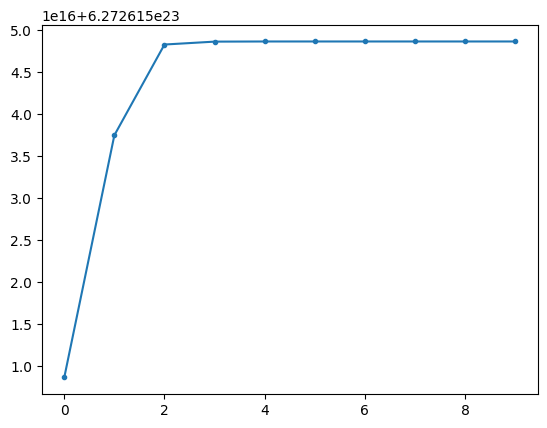

In [147]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_.cumsum(),marker='.')

# a megfelelő időszakok kiválasztása

In [ ]:
def mode_func(column):
    return column.mode().iloc[0] 

def datagen_modeA(origdf, startnap, endnap):
    df2 = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    
    
    # TARGET VALTOZO 
    # a következő évben bekövetkező eseményeket nézzük
    # k: késedelmes lesz
    feltetel = (df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT'] == 'K')
    
    df['target'] = 0
    df.loc[feltetel,'target']=1
   
    
    return df
    

# MEGADOTT IDŐPONTOK ÉS TARGET VÁLTOZÓK
R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,365*2,365*3)

AGGREGÁLÓ FÜGGVÉNYEK

In [148]:
df_float.columns

Index(['CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_INCOME',
       'CONTRACT_INSTALMENT_AMOUNT', 'CONTRACT_INSTALMENT_AMOUNT_2',
       'CONTRACT_INTEREST_PERIOD', 'CONTRACT_INTEREST_RATE',
       ...
       'CONTRACT_LOAN_TYPE_955ae3ef', 'CONTRACT_LOAN_TYPE_95c4f8fb',
       'CONTRACT_LOAN_TYPE_b503a0de', 'CONTRACT_LOAN_TYPE_cde77491',
       'CONTRACT_LOAN_TYPE_cf07c2dd', 'CONTRACT_LOAN_TYPE_d3aaffde',
       'CONTRACT_LOAN_TYPE_eab72d7a', 'CONTRACT_LOAN_TYPE_f792971b',
       'BORROWER_TYPE_OF_CUSTOMER_B', 'target'],
      dtype='object', length=180)

In [ ]:
def datagen_modeA(origdf, startnap, endnap):
    df2 = origdf[origdf['CONTRACT_DATE_OF_LOAN_AGREEMENT']>=startnap].copy()
    df = df2[df2['CONTRACT_DATE_OF_LOAN_AGREEMENT']<endnap].copy()
    cust_df = pd.DataFrame({'BORROWER_ID':df['BORROWER_ID'].unique()})
    
    
    # TARGET VALTOZO 
    # a következő évben bekövetkező eseményeket nézzük
    # k: késedelmes lesz
    feltetel = (df['TARGET_EVENT_DAY']>endnap) & (df['TARGET_EVENT_DAY']<endnap+2*365) & (df['TARGET_EVENT'] == 'K')
    #feltetel_2 = (df['TARGET_EVENT_DAY']<endnap) & (df['TARGET_EVENT_DAY']<startnap) & (df['TARGET_EVENT'] == 'K') #egy éven belül elbukott
    df['target'] = 0
    df.loc[feltetel,'target']=1
    #df.loc[feltetel_2,'target']=2
    
    # drop rows where target is 2
    #df = df[df['target']!=2]
    
    stat = df.groupby('BORROWER_ID',as_index=False).agg({'target':'max'})
    # akik nem fizettek az 1 lesz
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
    # mindenki más aki előtörlesztett vagy semmi nem történt az 0
    cust_df['target'] = cust_df['target'].fillna(0)
    
    
    # BEMENO VALTOZOK
    # törlesztőösszeg ÉS RISK
    # csak sum és mean hasznlata !!!!!!!!!!!!!!!!!
    stat = df.groupby("BORROWER_ID", as_index=False).agg({'CONTRACT_ID':'count',
                                                          'CONTRACT_LOAN_AMOUNT':'sum',
                                                          'CONTRACT_INSTALMENT_AMOUNT':'sum',
                                                          'CONTRACT_INSTALMENT_AMOUNT_2':'sum',
                                                          'CONTRACT_RISK_WEIGHTED_ASSETS':'sum',
                                                          'CONTRACT_INTEREST_RATE': 'mean',
                                                          'CONTRACT_CREDIT_LOSS':'sum',
                                                          'CONTRACT_CURRENCY':mode_func,
                                                          'CONTRACT_DEPT_SERVICE_TO_INCOME':'mean',
                                                          ###'CONTRACT_FREQUENCY_TYPE':'median',
                                                          'CONTRACT_INCOME':'sum',
                                                          'CONTRACT_INTEREST_PERIOD':'mean',
                                                          'CONTRACT_INTEREST_RATE':'mean',
                                                          'CONTRACT_LGD':'max',
                                                          ###lehet##'CONTRACT_LOAN_CONTRACT_TYPE':mode_func,
                                                          'CONTRACT_LOAN_TO_VALUE_RATIO':'mean',
                                                          'CONTRACT_LOAN_TYPE':mode_func,
                                                          'CONTRACT_MORTGAGE_LENDING_VALUE':'sum',
                                                          ##'CONTRACT_MORTGAGE_TYPE':mode_func,
                                                          ###'CONTRACT_REFINANCED':'median',
                                                          ##'CONTRACT_TYPE_OF_INTEREST_REPAYMENT':mode_func,
                                                          ####lehet##'BORROWER_TYPE_OF_CUSTOMER':mode_func,
                                                          ##'BORROWER_TYPE_OF_SETTLEMENT':mode_func,
                                                          ##'BORROWER_COUNTY':mode_func,
                                                          ##'BORROWER_COUNTRY':mode_func,
                                                          ##'BORROWER_CITIZENSHIP':mode_func,  
                                                          'CONTRACT_MARKET_VALUE':'sum',                                                        
                                                          })
    print(stat.columns)
    cust_df = cust_df.merge(stat,on='BORROWER_ID',how='left')
   
    
   
    
    return cust_df
    

R1 = datagen_modeA(df,0,365)
R2 = datagen_modeA(df,0,365*3)
    

Stacking model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

# Assuming you have your own dataset or will load it here
# X, y = load_your_dataset()
X = R1.drop(['BORROWER_ID','target',],axis=1)
y = R1['target']

# Creating base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ert_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Creating the Stacking Classifier
estimators = [
    ('rf', rf_model),
    ('ert', ert_model),
    ('xgb', xgb_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the stacking model
stacking_model.fit(X_train, y_train)

# Making predictions, predict gives the actual class prediction
y_pred = stacking_model.predict(X_test)

# Making predictions (predict_proba gives probabilities)
y_pred_proba = stacking_model.predict_proba(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model: {accuracy*100:.2f}%")

# Calculating log loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss of Stacking Model: {logloss:.4f}")

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Use the probabilities of the positive class
print(f"ROC-AUC of Stacking Model: {roc_auc:.4f}")